In [20]:
import pandas as pd


In [21]:
with open(r'c:\Users\user\Desktop\global air pollution dataset.csv') as dataset:
    df_ap = pd.read_csv(dataset)
df_ap

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good
...,...,...,...,...,...,...,...,...,...,...,...,...
23458,India,Gursahaiganj,184,Unhealthy,3,Good,154,Unhealthy,2,Good,184,Unhealthy
23459,France,Sceaux,50,Good,1,Good,20,Good,5,Good,50,Good
23460,India,Mormugao,50,Good,1,Good,22,Good,1,Good,50,Good
23461,United States of America,Westerville,71,Moderate,1,Good,44,Good,2,Good,71,Moderate


In [22]:
df_ap.isnull().sum()

Country               427
City                    1
AQI Value               0
AQI Category            0
CO AQI Value            0
CO AQI Category         0
Ozone AQI Value         0
Ozone AQI Category      0
NO2 AQI Value           0
NO2 AQI Category        0
PM2.5 AQI Value         0
PM2.5 AQI Category      0
dtype: int64

In [23]:
df_ap2 = df_ap.drop(columns=['Country','AQI Category','CO AQI Category','Ozone AQI Category','NO2 AQI Category','PM2.5 AQI Category'])
df_ap2.dropna(inplace=True)
df_ap2.drop_duplicates(inplace=True)


In [24]:
df_ap2.columns

Index(['City', 'AQI Value', 'CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value',
       'PM2.5 AQI Value'],
      dtype='object')

In [25]:
cols =['AQI Value', 'CO AQI Value', 'Ozone AQI Value',
       'NO2 AQI Value', 'PM2.5 AQI Value']

In [26]:
df_ap3=df_ap2.groupby('City').mean().reset_index()
df_ap3

,City,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value
0,A Coruna,27.0,0.0,27.0,1.0,20.0
1,Aabenraa,45.0,1.0,38.0,2.0,45.0
2,Aachen,55.0,1.0,43.0,1.0,55.0
3,Aalborg,46.0,1.0,46.0,0.0,12.0
4,Aalburg,30.0,0.0,30.0,2.0,29.0
...,...,...,...,...,...,...
23457,Zwijndrecht,39.0,1.0,39.0,1.0,33.0
23458,Zwolle,31.0,1.0,30.0,3.0,31.0
23459,Zwonitz,54.0,1.0,46.0,0.0,54.0
23460,Zyrardow,57.0,1.0,35.0,2.0,57.0


In [27]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import OrdinalEncoder , MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


In [28]:


X = df_ap2.copy()
cat_cols=['City']
num_cols=['AQI Value', 'CO AQI Value', 'Ozone AQI Value','NO2 AQI Value', 'PM2.5 AQI Value']


In [29]:
cat_trans = Pipeline([
    ('cat',OrdinalEncoder()),
])
num_trans = Pipeline([
    ('num',MinMaxScaler()),
])
preprocessor = ColumnTransformer([
    ('ordinal_encoder',cat_trans,cat_cols),
    ('min_max_scaler',num_trans,num_cols),
])
preprocessor

ColumnTransformer(transformers=[('ordinal_encoder',
                                 Pipeline(steps=[('cat', OrdinalEncoder())]),
                                 ['City']),
                                ('min_max_scaler',
                                 Pipeline(steps=[('num', MinMaxScaler())]),
                                 ['AQI Value', 'CO AQI Value',
                                  'Ozone AQI Value', 'NO2 AQI Value',
                                  'PM2.5 AQI Value'])])

In [30]:
# sil_scores = {}
# ks = [110,115,120]
# for k in ks:
#     pipe = Pipeline([
#         ('preprocessor', preprocessor),
#         ('kmeans', KMeans(n_clusters=k, random_state=42))
#     ])
    
#     pipe.fit(X)
    
#     X_transformed = pipe.named_steps['preprocessor'].transform(X)
#     labels = pipe.named_steps['kmeans'].labels_
    
#     score = silhouette_score(X_transformed, labels)
#     sil_scores[k] = score

# print(sil_scores)

In [31]:
pipe1 = Pipeline([
    ('preprocessor', preprocessor),
    ('kmeans', KMeans(n_clusters=6, random_state=42))
])

pipe1.fit(X)

X_1 = pipe1.named_steps['preprocessor'].transform(X)
labels1 = pipe1.named_steps['kmeans'].labels_

score1 = silhouette_score(X_1, labels1)
print(score1)


0.5533944223492789


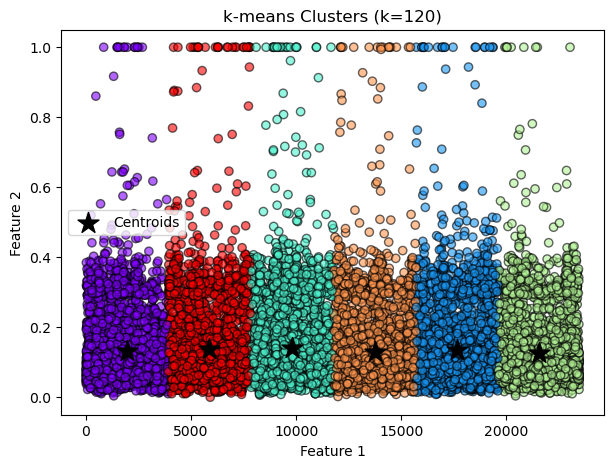

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

labels1 = pipe1.named_steps['kmeans'].labels_
centers = pipe1.named_steps['kmeans'].cluster_centers_

plt.figure(figsize=(7, 5))
plt.scatter(X_1[:, 0], X_1[:,1], c=labels1, cmap='rainbow', alpha=0.6, edgecolor='k')
plt.scatter(centers[:,0], centers[:, 1], s=250, marker='*', c='black', label='Centroids')
plt.title("k-means Clusters (k=120)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

In [33]:
from sklearn.decomposition import PCA
from sklearn. manifold import TSNE

pca = PCA(n_components=2,random_state=41)
X1pca = pca.fit_transform(X_1)



In [34]:

tsne = TSNE(n_components=2, random_state=41, perplexity=20)
X_tsne = tsne.fit_transform(X_1)



C:\Users\user\AppData\Local\Temp\ipykernel_14784\2821288677.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


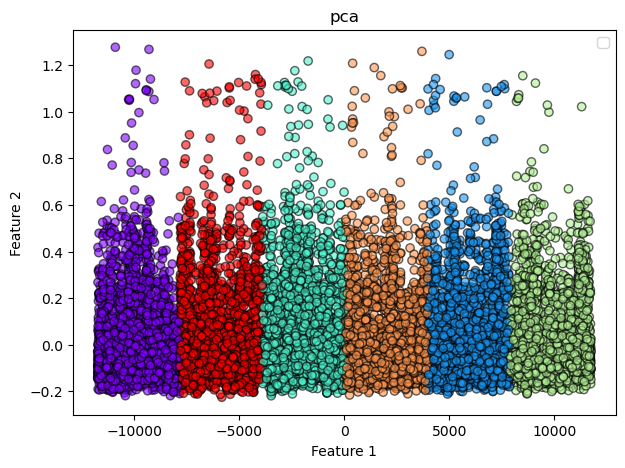

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline


plt.figure(figsize=(7, 5))
plt.scatter(X1pca[:, 0], X1pca[:,1], c=labels1, cmap='rainbow', alpha=0.6, edgecolor='k')
plt.title("pca")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_14784\3309243791.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


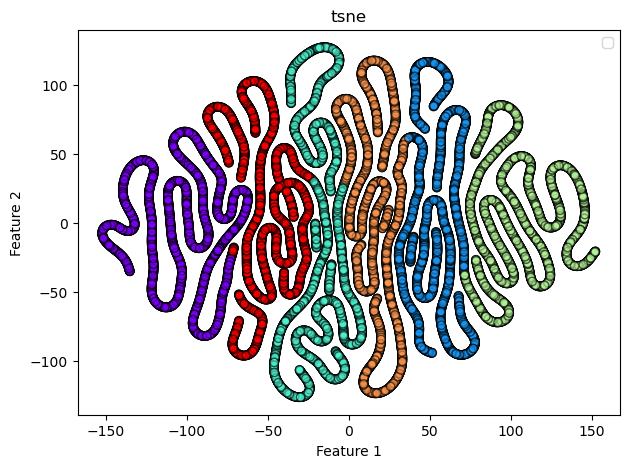

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline


plt.figure(figsize=(7, 5))
plt.scatter(X_tsne[:, 0], X_tsne[:,1], c=labels1, cmap='rainbow', alpha=0.6, edgecolor='k')
plt.title("tsne")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

0.5161852479445939
Hierarchical Silhouette: 0.4833512331576641
Hierarchical Cophenet Correlation: 0.7264342140658


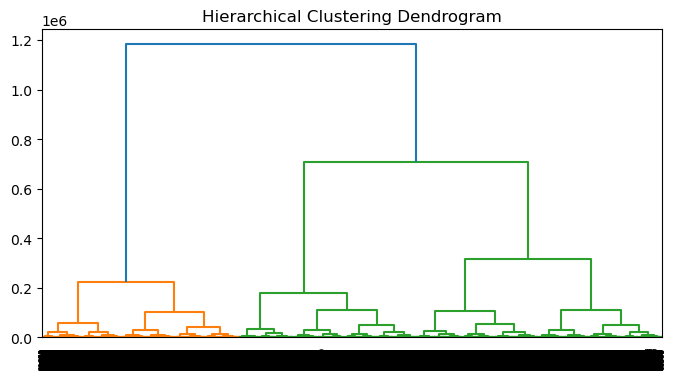

In [37]:


import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import cophenet


def clustering_evaluation_example():
    pipe1 = Pipeline([
    ('preprocessor', preprocessor),
    ('kmeans', KMeans(n_clusters=120, random_state=42))
])

    pipe1.fit(X)

    X_2 = pipe1.named_steps['preprocessor'].transform(X)
    labels1 = pipe1.named_steps['kmeans'].labels_

    score1 = silhouette_score(X_2, labels1)
    print(score1)

        

    
    linkage_mat = sch.linkage(X_2, method="ward") 
    
    from scipy.cluster.hierarchy import fcluster
    labels_hc = fcluster(linkage_mat, t=120, criterion="maxclust") 

    # silhouette
    sil_hc = silhouette_score(X_2, labels_hc)
    print("Hierarchical Silhouette:", sil_hc)

    # cophenet correlation
    coph_corr, _ = cophenet(linkage_mat, pdist(X_2))
    print("Hierarchical Cophenet Correlation:", coph_corr)

    # let's do a quick plot to see the dendrogram
    import matplotlib.pyplot as plt
    plt.figure(figsize=(8,4))
    sch.dendrogram(linkage_mat)
    plt.title("Hierarchical Clustering Dendrogram")
    plt.show()


clustering_evaluation_example()